In [34]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)
weather_df = weather_df.rename(columns={'Name': 'COC_NAME', 'Value': 'RainfallInInches'})
weather_df['COC_NAME'] = weather_df['COC_NAME'].str.replace(' County', '')
weather_df = weather_df[['COC_NAME', 'RainfallInInches', 'Year']]
weather_df = weather_df.set_index('COC_NAME')
weather_df

,RainfallInInches,Year
COC_NAME,,
Alameda,24.97,2017
Alpine,64.24,2017
Amador,55.94,2017
Butte,56.41,2017
Calaveras,51.55,2017
...,...,...
Tulare,12.31,2022
Tuolumne,29.48,2022
Ventura,9.95,2022


In [35]:

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Clean age data
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT'] != '*']
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')
clean_age_df

/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/1478504379.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/1478504379.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')


,CALENDAR_YEAR,COC_ID,COC_NAME,AGE_GROUP_PUBLIC,EXPERIENCING_HOMELESSNESS_CNT
0,2017,All,California,18-24,15862
1,2017,All,California,25-34,28339
2,2017,All,California,35-44,25556
3,2017,All,California,45-54,27441
4,2017,All,California,55-64,23220
...,...,...,...,...,...
2136,2022,CA-614,San Luis Obispo,45-54,389
2137,2022,CA-614,San Luis Obispo,55-64,360
2138,2022,CA-614,San Luis Obispo,65+,174
2139,2022,CA-614,San Luis Obispo,Under 18,742


In [36]:

# Group by year and COC Name and sum homeless counts
total_homeless_count = clean_age_df.groupby(['CALENDAR_YEAR', 'COC_NAME'])['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()

# Edit COC_NAME values in total_homeless_count to remove " CoC" from the end
total_homeless_count['COC_NAME'] = total_homeless_count['COC_NAME'].str.replace(' CoC', '')


In [37]:
# Merge the two data frames based on COC_NAME and Year
merged_df = pd.merge(total_homeless_count, weather_df, left_on=['COC_NAME', 'CALENDAR_YEAR'], right_on=['COC_NAME', 'Year'], how='inner')

# Perform correlation analysis
correlation = merged_df['EXPERIENCING_HOMELESSNESS_CNT'].corr(merged_df['RainfallInInches'])
print("Correlation coefficient:", correlation)


Correlation coefficient: -0.24817506787673616


In [38]:

# Find values that don't match between the two data frames
mismatched_values = set(total_homeless_count['COC_NAME']) - set(weather_df.index)
print("Values that don't match:", mismatched_values)


Values that don't match: {'Fresno, Madera Counties', 'Colusa, Glenn, Trinity Counties', 'Long Beach (Los Angeles County)', 'Glendale (Los Angeles County)', 'Monterey, San Benito Counties', 'Kings, Tulare Counties', 'Amador, Calaveras, Mariposa, Tuolumne Counties', 'Yuba, Sutter Counties', 'California', 'Pasadena (Los Angeles County)', 'Alpine, Inyo, Mono Counties', 'Shasta, Siskiyou, Lassen, Plumas, Del Norte, Modoc, Sierra Counties'}


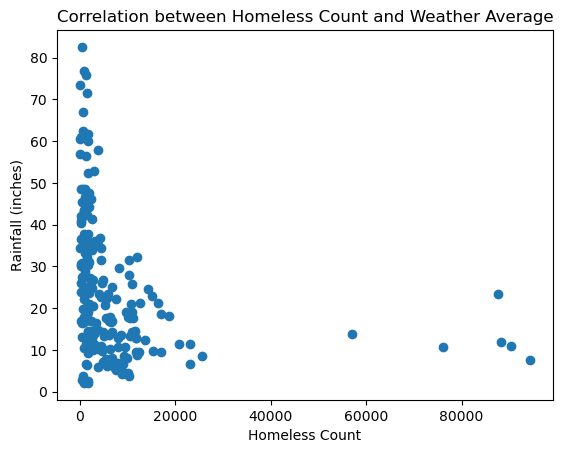

In [41]:

# Plotting correlation
plt.scatter(merged_df['EXPERIENCING_HOMELESSNESS_CNT'], merged_df['RainfallInInches'])
plt.xlabel('Homeless Count')
plt.ylabel('Rainfall (inches)')
plt.title('Correlation between Homeless Count and Weather Average')
plt.show()


/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/3685034565.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/3685034565.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')


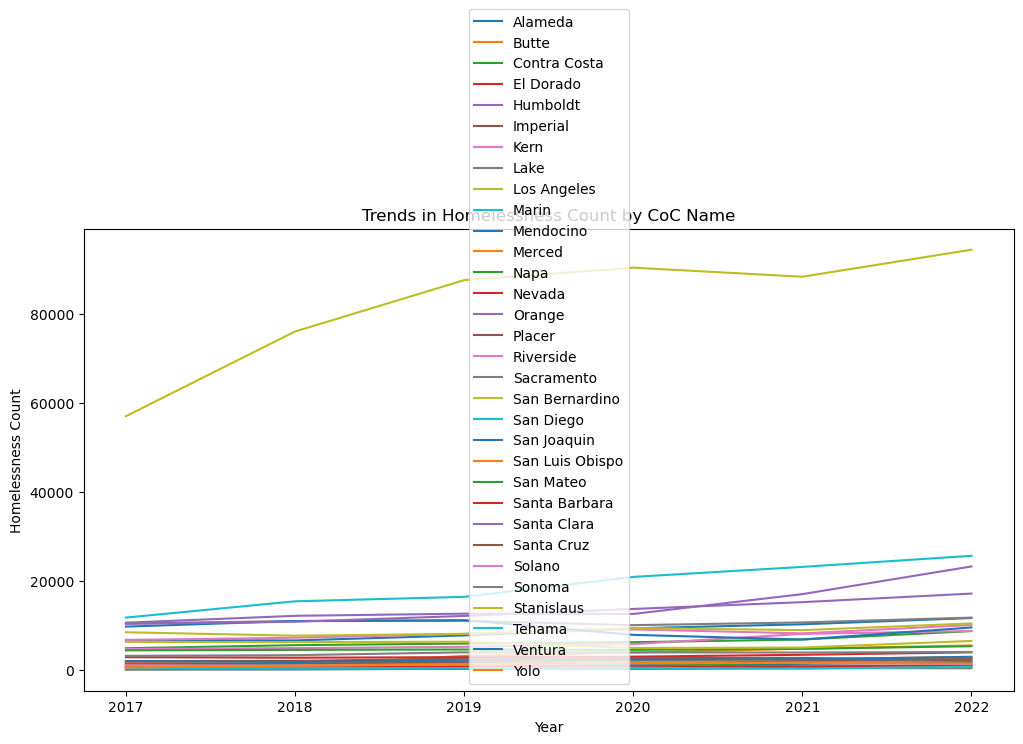

In [42]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)
weather_df = weather_df.rename(columns={'Name': 'COC_NAME', 'Value': 'RainfallInInches'})
weather_df['COC_NAME'] = weather_df['COC_NAME'].str.replace(' County', '')
weather_df = weather_df[['COC_NAME', 'RainfallInInches', 'Year']]
weather_df = weather_df.set_index('COC_NAME')

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Clean age data
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT'] != '*']
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')

# Group by year and COC Name and sum homeless counts
total_homeless_count = clean_age_df.groupby(['CALENDAR_YEAR', 'COC_NAME'])['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()

# Merge the two data frames based on COC_NAME and Year
merged_df = pd.merge(total_homeless_count, weather_df, left_on=['COC_NAME', 'CALENDAR_YEAR'], right_on=['COC_NAME', 'Year'], how='inner')

# Plot trends in homelessness count for each CoC Name
coc_names = merged_df['COC_NAME'].unique()
plt.figure(figsize=(12, 6))

for coc_name in coc_names:
    coc_data = merged_df[merged_df['COC_NAME'] == coc_name]
    plt.plot(coc_data['CALENDAR_YEAR'], coc_data['EXPERIENCING_HOMELESSNESS_CNT'], label=coc_name)

plt.xlabel('Year')
plt.ylabel('Homelessness Count')
plt.title('Trends in Homelessness Count by CoC Name')
plt.legend()
plt.show()

/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/2695409798.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/2695409798.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')


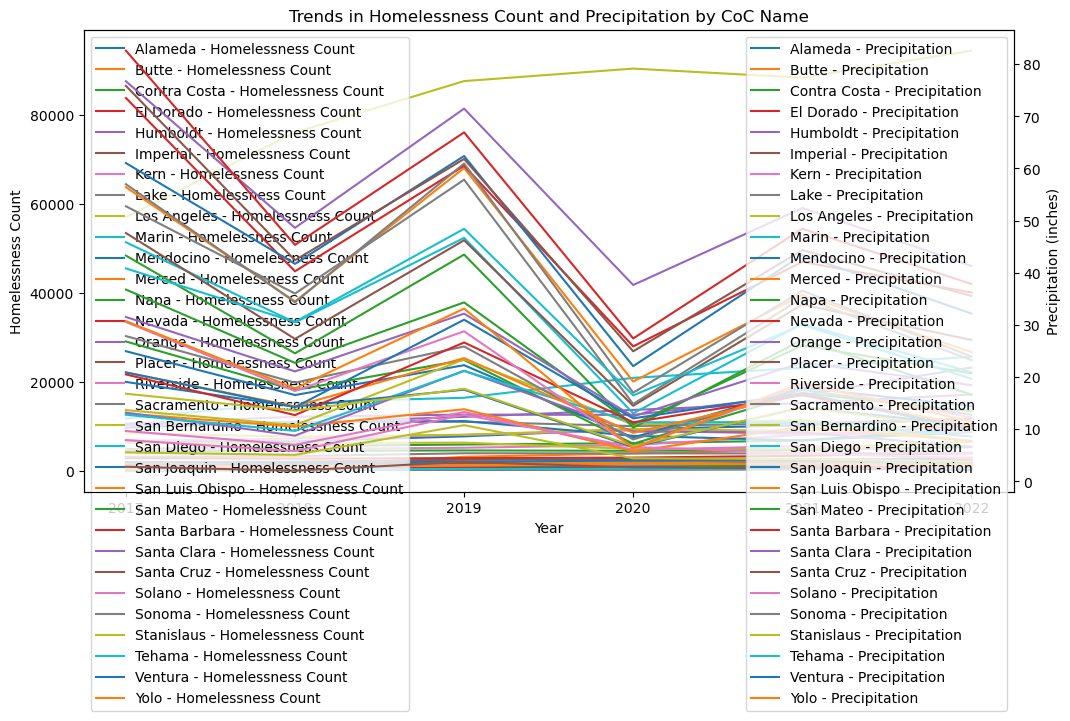

In [43]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)
weather_df = weather_df.rename(columns={'Name': 'COC_NAME', 'Value': 'RainfallInInches'})
weather_df['COC_NAME'] = weather_df['COC_NAME'].str.replace(' County', '')
weather_df = weather_df[['COC_NAME', 'RainfallInInches', 'Year']]
weather_df = weather_df.set_index('COC_NAME')

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Clean age data
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT'] != '*']
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')

# Group by year and COC Name and sum homeless counts
total_homeless_count = clean_age_df.groupby(['CALENDAR_YEAR', 'COC_NAME'])['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()

# Merge the two data frames based on COC_NAME and Year
merged_df = pd.merge(total_homeless_count, weather_df, left_on=['COC_NAME', 'CALENDAR_YEAR'], right_on=['COC_NAME', 'Year'], how='inner')

# Plot trends in homelessness count and precipitation for each CoC Name
coc_names = merged_df['COC_NAME'].unique()

plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

for coc_name in coc_names:
    coc_data = merged_df[merged_df['COC_NAME'] == coc_name]
    ax1.plot(coc_data['CALENDAR_YEAR'], coc_data['EXPERIENCING_HOMELESSNESS_CNT'], label=f'{coc_name} - Homelessness Count')
    ax2.plot(coc_data['CALENDAR_YEAR'], coc_data['RainfallInInches'], label=f'{coc_name} - Precipitation')

ax1.set_xlabel('Year')
ax1.set_ylabel('Homelessness Count')
ax2.set_ylabel('Precipitation (inches)')
ax1.set_title('Trends in Homelessness Count and Precipitation by CoC Name')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/3513481684.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/3513481684.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')
/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/

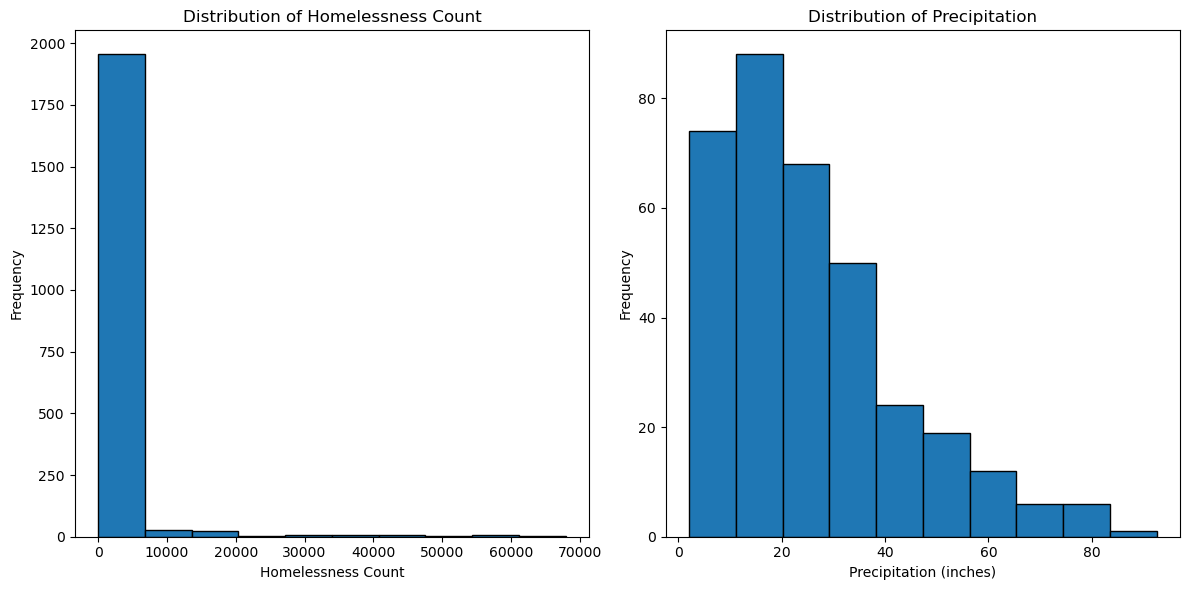

In [44]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)
weather_df = weather_df.rename(columns={'Name': 'COC_NAME', 'Value': 'RainfallInInches'})
weather_df['COC_NAME'] = weather_df['COC_NAME'].str.replace(' County', '')
weather_df = weather_df[['COC_NAME', 'RainfallInInches', 'Year']]
weather_df = weather_df.set_index('COC_NAME')

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Clean age data
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT'] != '*']
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')

# Group by COC Name and calculate mean homelessness count and precipitation
merged_df = pd.merge(clean_age_df, weather_df, on='COC_NAME', how='inner')
mean_df = merged_df.groupby('COC_NAME').mean().reset_index()

# Plot histograms for homelessness count and precipitation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'], bins=10, edgecolor='black')
plt.xlabel('Homelessness Count')
plt.ylabel('Frequency')
plt.title('Distribution of Homelessness Count')

plt.subplot(1, 2, 2)
plt.hist(weather_df['RainfallInInches'], bins=10, edgecolor='black')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt

# Read shapefile data for California counties
shapefile_path = Path('california_counties.shp')
counties_gdf = gpd.read_file(shapefile_path)

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)
weather_df = weather_df.rename(columns={'Name': 'COC_NAME', 'Value': 'RainfallInInches'})
weather_df['COC_NAME'] = weather_df['COC_NAME'].str.replace(' County', '')
weather_df = weather_df[['COC_NAME', 'RainfallInInches', 'Year']]
weather_df = weather_df.set_index('COC_NAME')

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Clean age data
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT'] != '*']
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')

# Group by year and COC Name and sum homeless counts
total_homeless_count = clean_age_df.groupby(['CALENDAR_YEAR', 'COC_NAME'])['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()

# Merge the two data frames based on COC_NAME and Year
merged_df = pd.merge(total_homeless_count, weather_df, left_on=['COC_NAME', 'CALENDAR_YEAR'], right_on=['COC_NAME', 'Year'], how='inner')

# Generate maps and graphs for each unique year
unique_years = merged_df['CALENDAR_YEAR'].unique()

for year in unique_years:
    year_data = merged_df[merged_df['CALENDAR_YEAR'] == year]

    # Merge homeless count data with shapefile data
    merged_gdf = counties_gdf.merge(year_data, left_on='name', right_on='COC_NAME')

    # Plot map of California counties with color-coded homeless count
    fig, ax = plt.subplots(figsize=(12, 8))
    merged_gdf.plot(column='EXPERIENCING_HOMELESSNESS_CNT', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Homelessness Count by County - {year}')
    ax.axis('off')

    # Save the map as an image file
    plt.savefig(f'homelessness_count_map_{year}.png', dpi=300)

    # Plot graph of average precipitation by county
    plt.figure(figsize=(12, 6))
    plt.bar(year_data['COC_NAME'], year_data['RainfallInInches'])
    plt.xlabel('County')
    plt.ylabel('Precipitation (inches)')
    plt.title(f'Average Precipitation by County - {year}')
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Save the graph as an image file
    plt.savefig(f'average_precipitation_graph_{year}.png', dpi=300)

    # Show the plots
    plt.show()

/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/1258091648.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/1258091648.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')


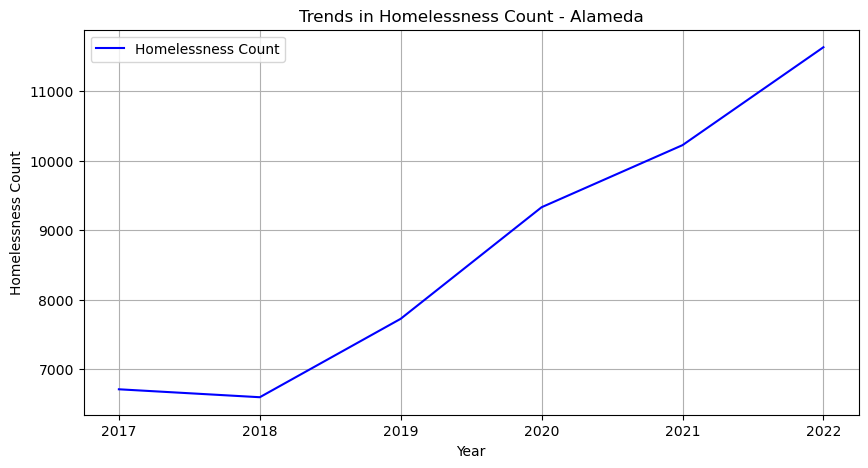

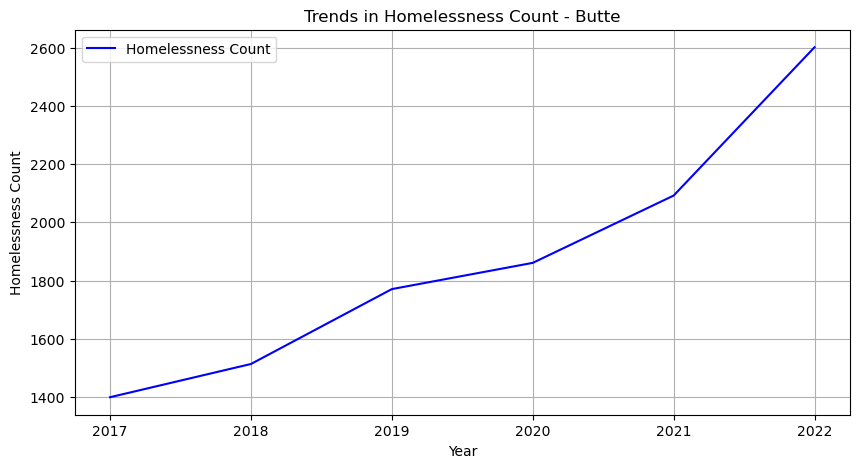

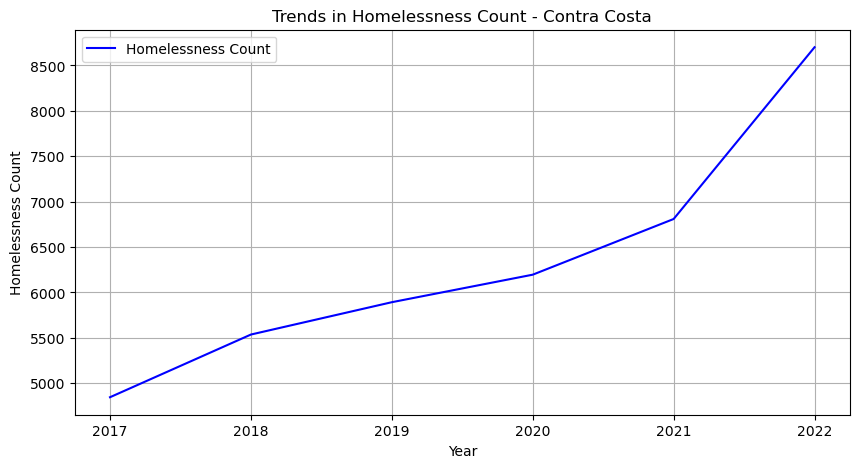

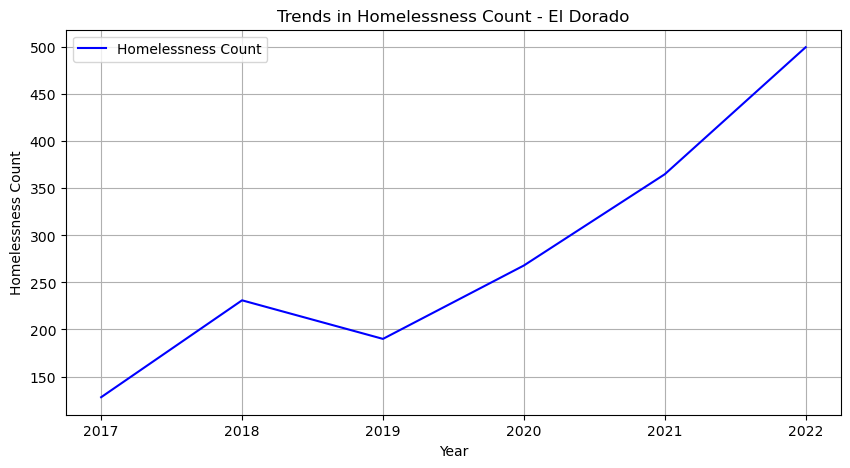

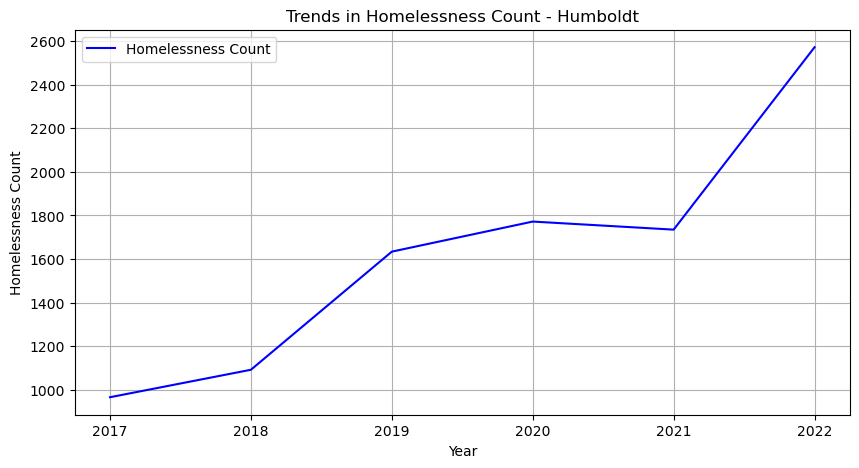

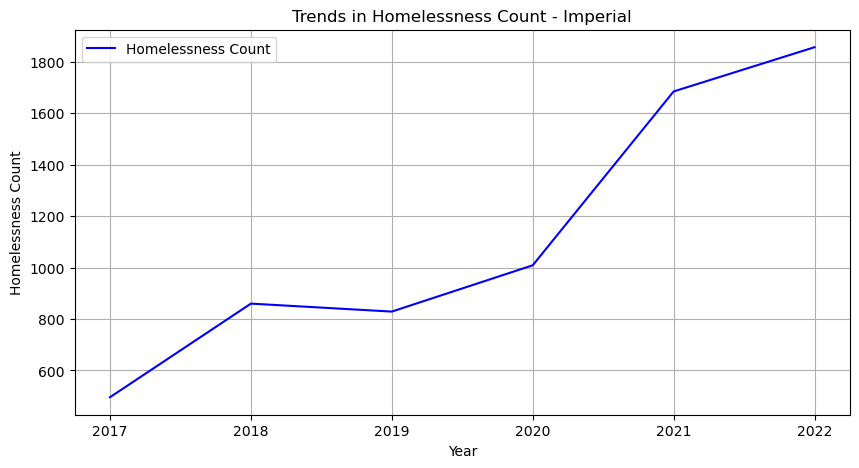

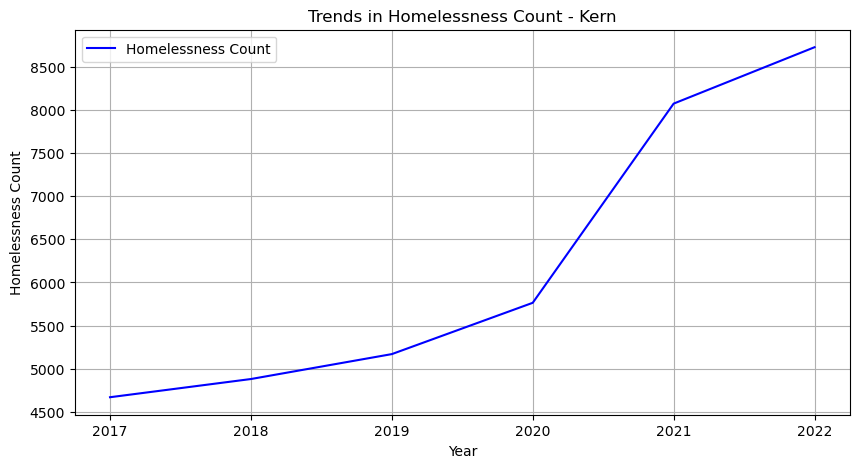

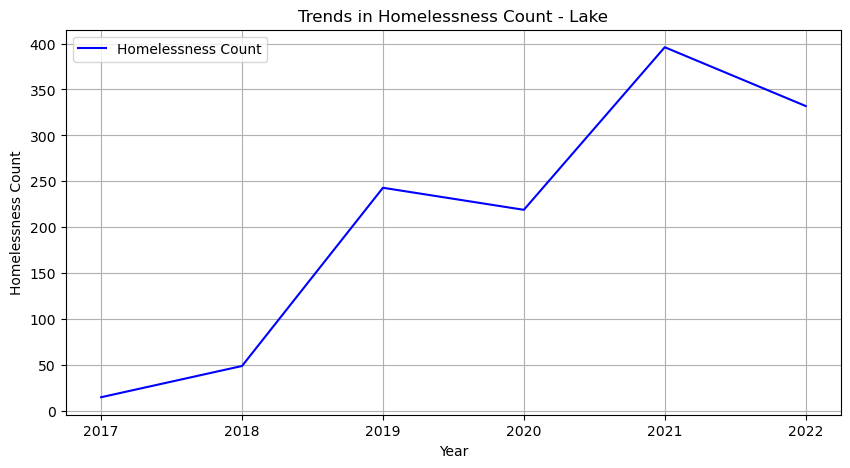

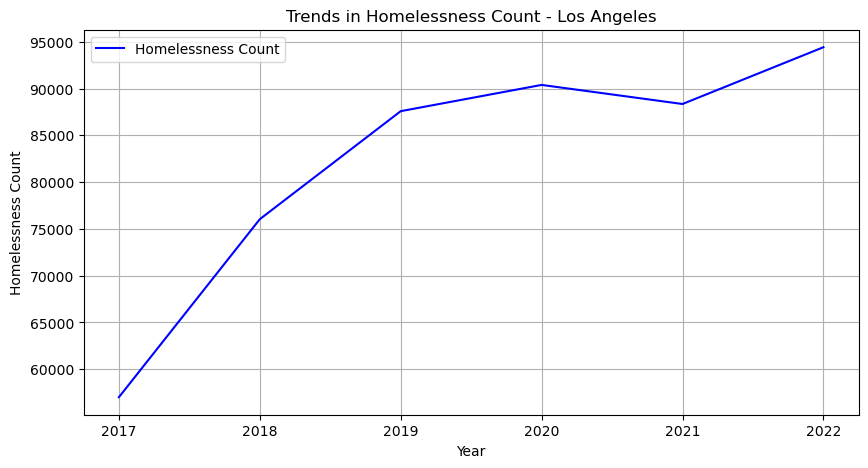

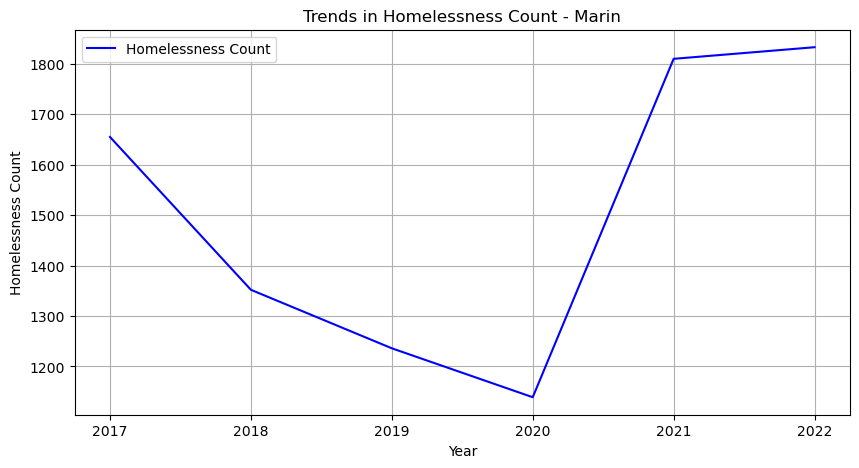

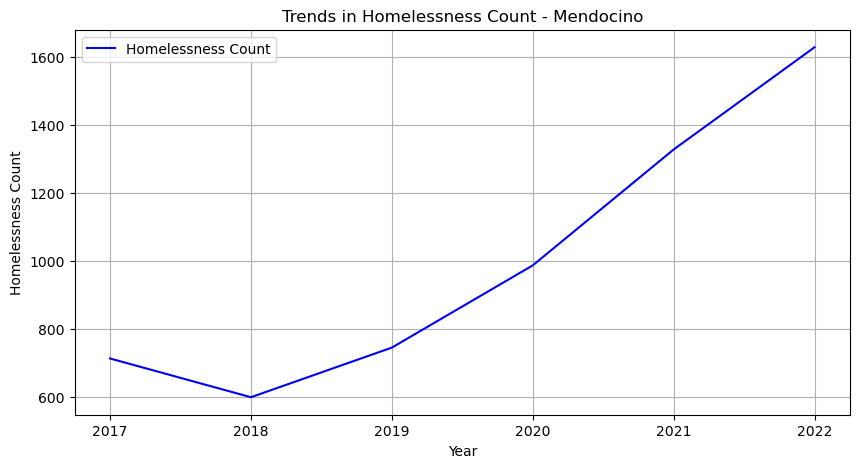

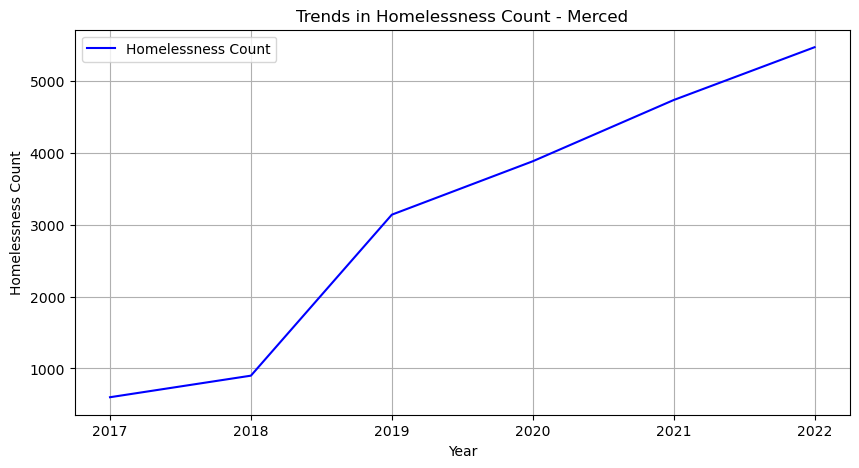

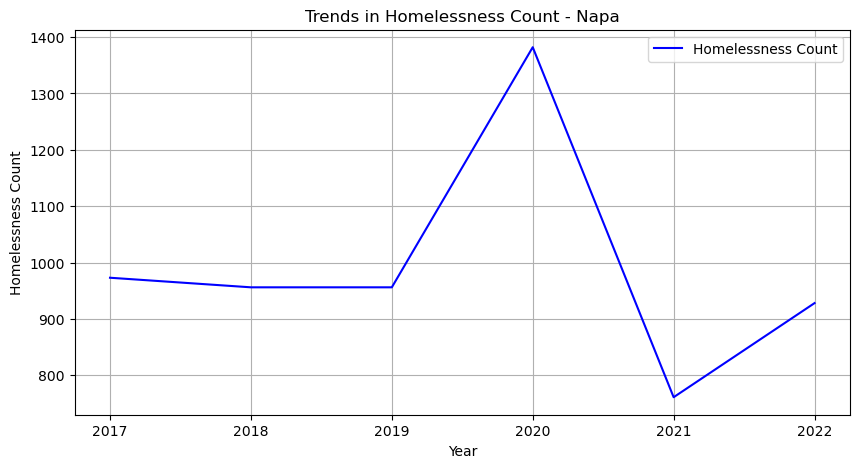

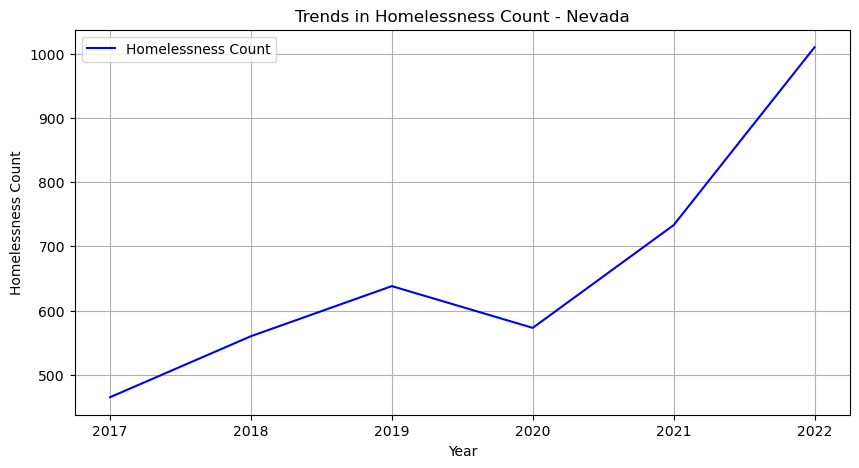

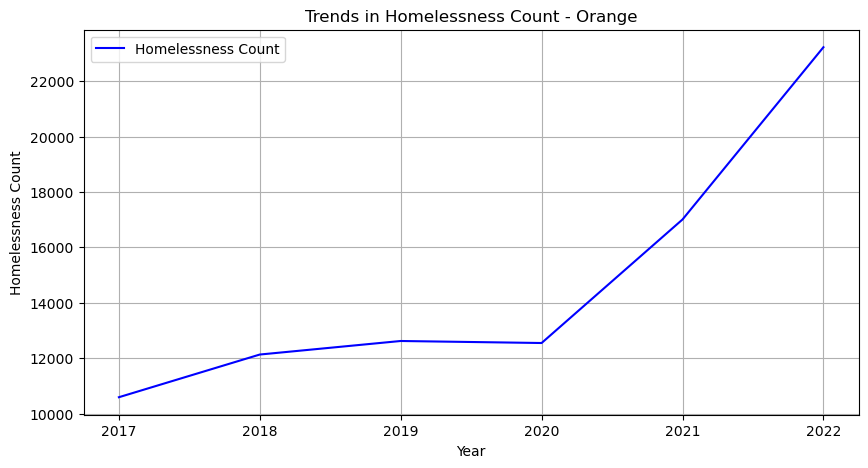

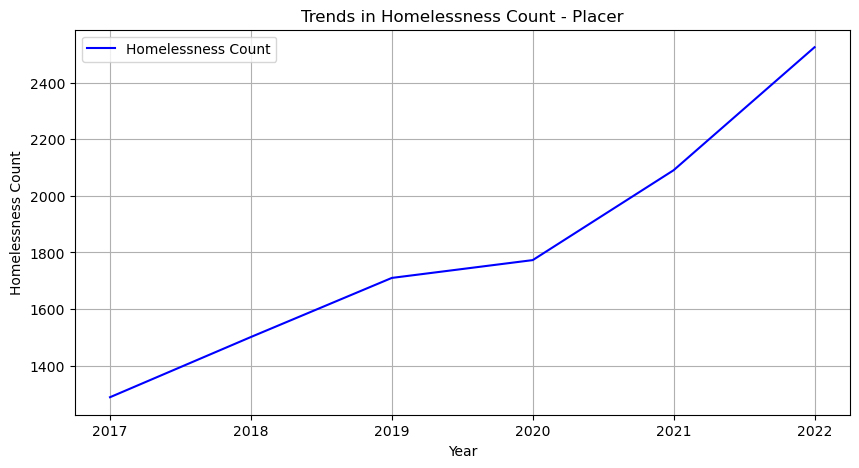

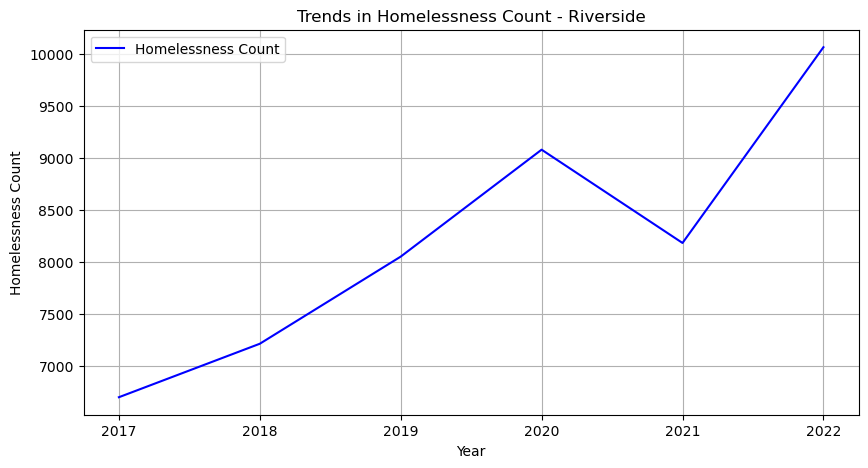

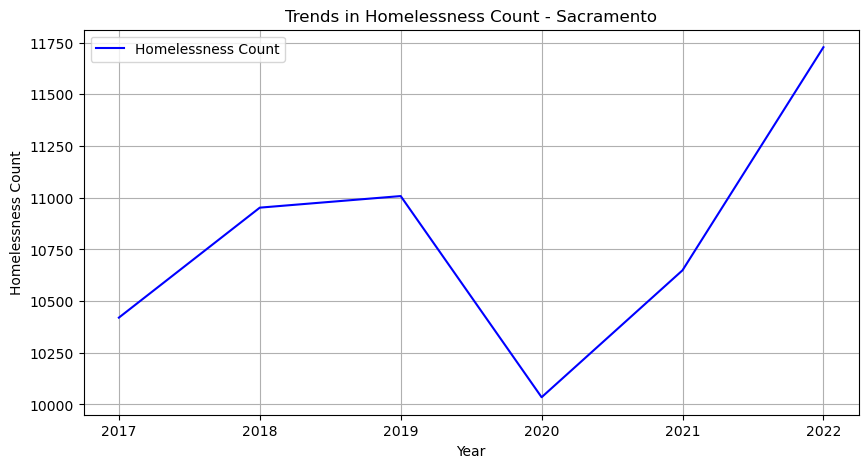

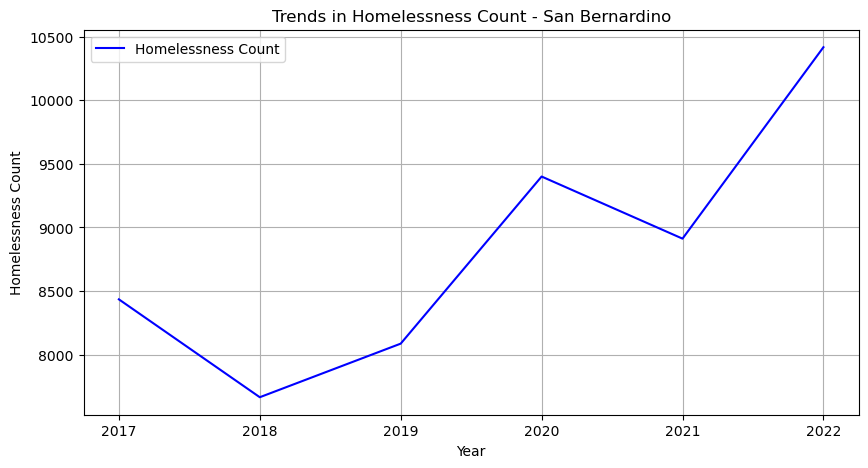

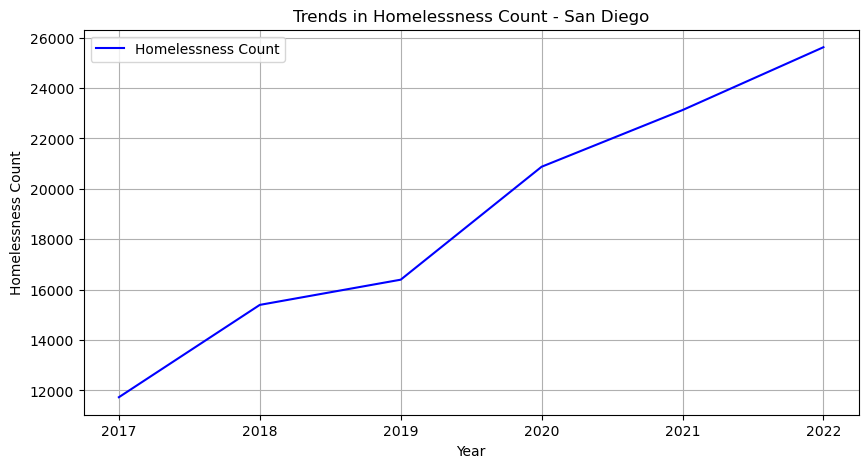

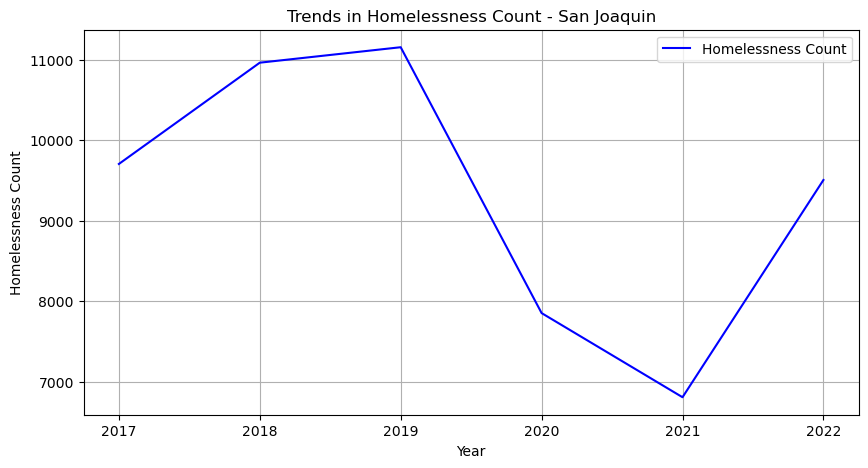

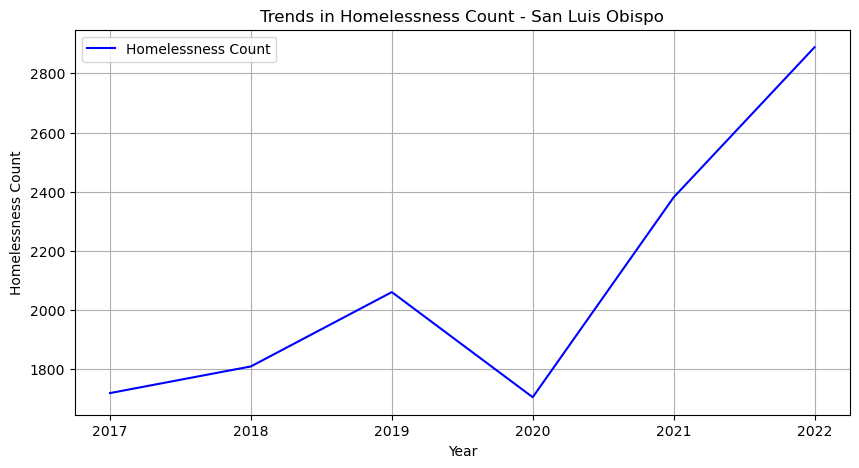

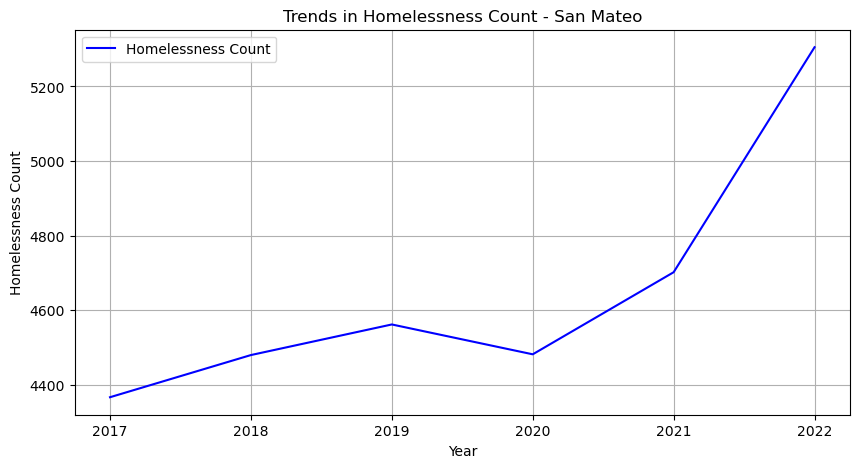

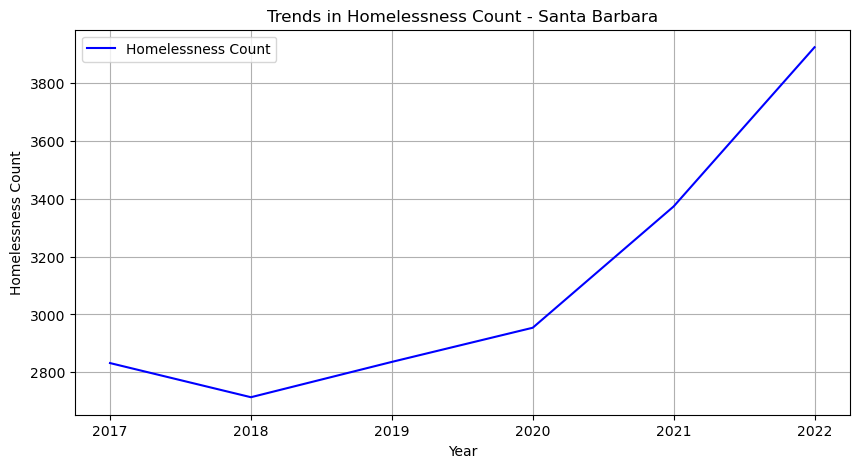

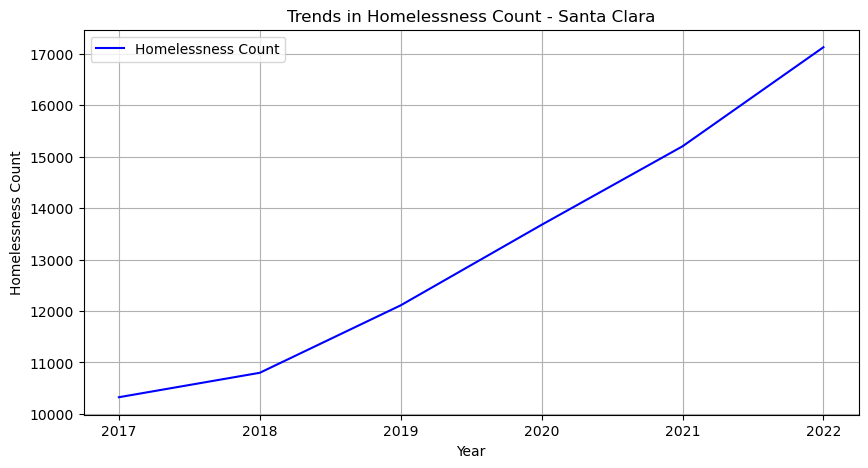

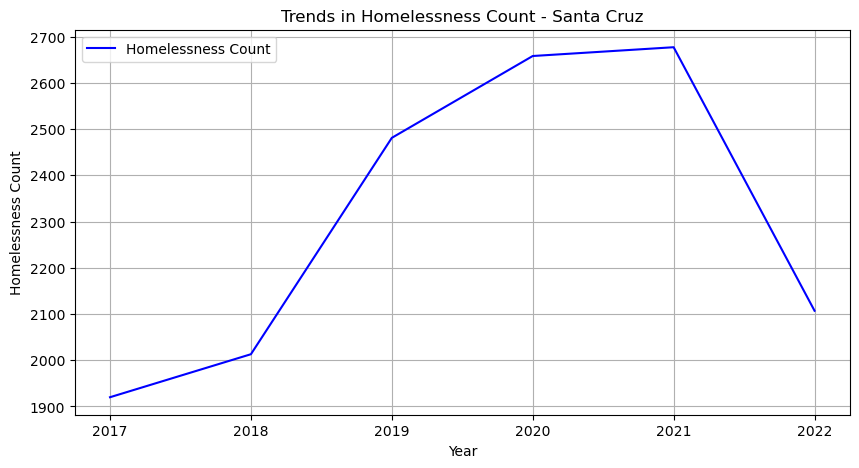

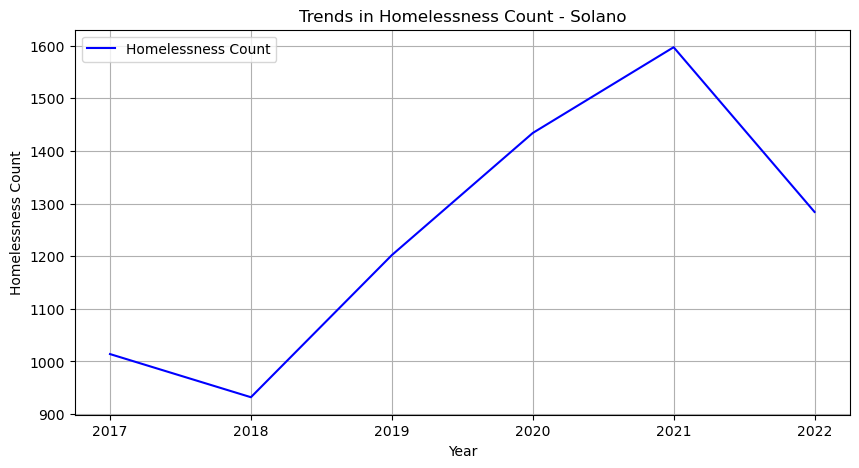

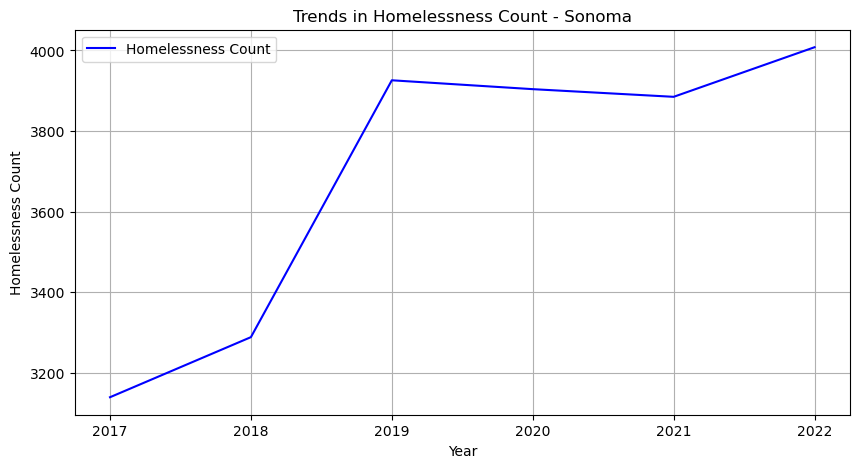

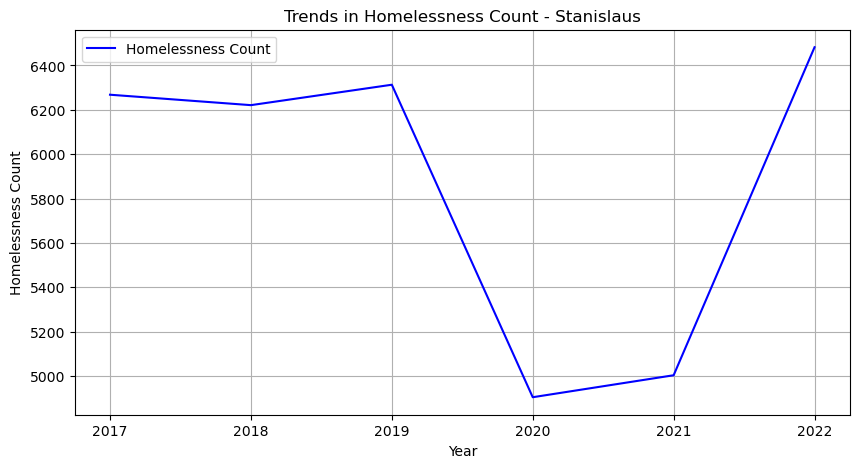

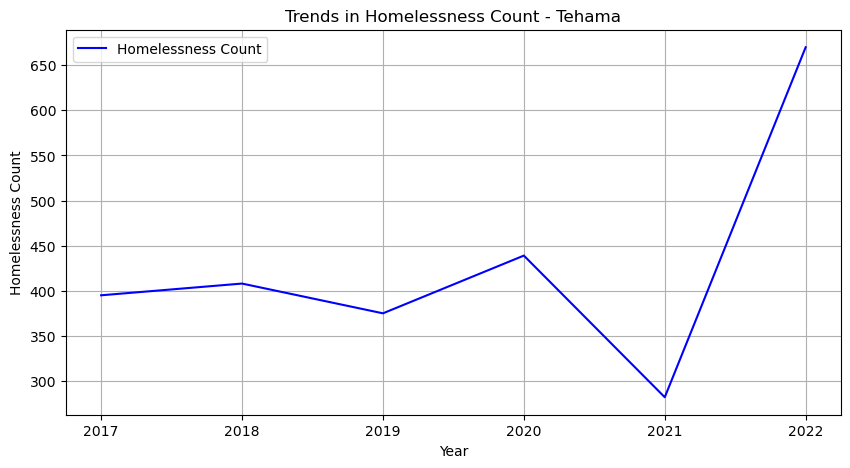

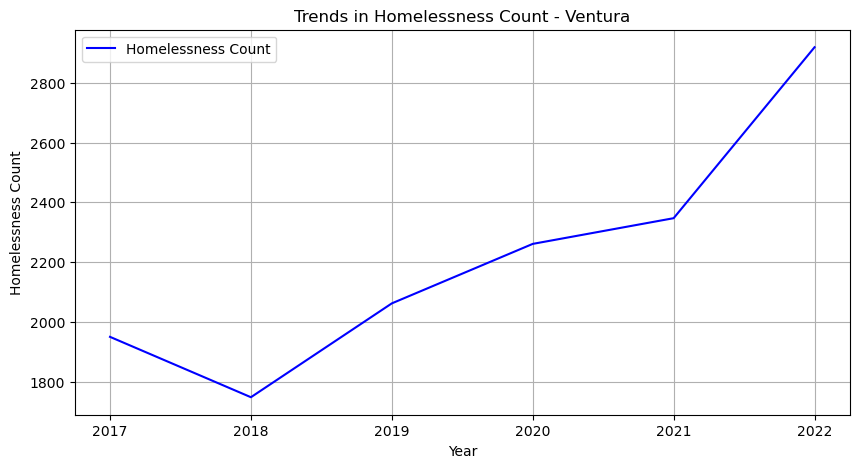

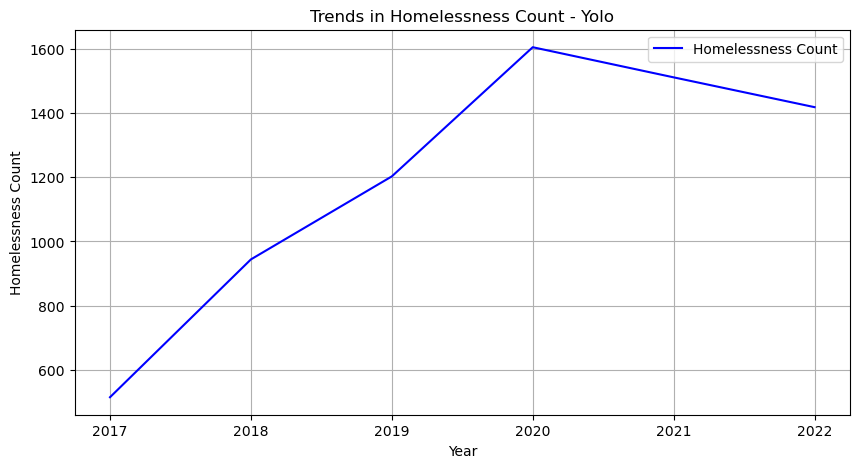

In [49]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)
weather_df = weather_df.rename(columns={'Name': 'COC_NAME', 'Value': 'RainfallInInches'})
weather_df['COC_NAME'] = weather_df['COC_NAME'].str.replace(' County', '')
weather_df = weather_df[['COC_NAME', 'RainfallInInches', 'Year']]
weather_df = weather_df.set_index('COC_NAME')

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Clean age data
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT'] != '*']
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')

# Group by year and COC Name and sum homeless counts
total_homeless_count = clean_age_df.groupby(['CALENDAR_YEAR', 'COC_NAME'])['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()

# Merge the two data frames based on COC_NAME and Year
merged_df = pd.merge(total_homeless_count, weather_df, left_on=['COC_NAME', 'CALENDAR_YEAR'], right_on=['COC_NAME', 'Year'], how='inner')

# Plot a different graph for each CoC Name
coc_names = merged_df['COC_NAME'].unique()

for coc_name in coc_names:
    coc_data = merged_df[merged_df['COC_NAME'] == coc_name]

    plt.figure(figsize=(10, 5))
    plt.plot(coc_data['CALENDAR_YEAR'], coc_data['EXPERIENCING_HOMELESSNESS_CNT'], label='Homelessness Count', color='b')
    plt.xlabel('Year')
    plt.ylabel('Homelessness Count')
    plt.title(f'Trends in Homelessness Count - {coc_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [50]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)
weather_df = weather_df.rename(columns={'Name': 'COC_NAME', 'Value': 'RainfallInInches'})
weather_df['COC_NAME'] = weather_df['COC_NAME'].str.replace(' County', '')
weather_df = weather_df[['COC_NAME', 'RainfallInInches', 'Year']]
weather_df = weather_df.set_index('COC_NAME')

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Clean age data
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT'] != '*']
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')

# Group by year and COC Name and sum homeless counts
total_homeless_count = clean_age_df.groupby(['CALENDAR_YEAR', 'COC_NAME'])['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()

# Merge the two data frames based on COC_NAME and Year
merged_df = pd.merge(total_homeless_count, weather_df, left_on=['COC_NAME', 'CALENDAR_YEAR'], right_on=['COC_NAME', 'Year'], how='inner')

# Read shapefile data for California counties
shapefile_path = Path('california_counties.shp')
counties_gdf = gpd.read_file(shapefile_path)

# Merge homeless count data with shapefile data
merged_gdf = counties_gdf.merge(merged_df, left_on='name', right_on='COC_NAME')

# Plot geospatial map of California counties with color-coded homelessness count
fig, ax = plt.subplots(figsize=(12, 8))
merged_gdf.plot(column='EXPERIENCING_HOMELESSNESS_CNT', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Homelessness Count by County in California')
ax.axis('off')

# Save the map as an image file
plt.savefig('homelessness_count_map.png', dpi=300)

# Show the plot
plt.show()

/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/2314981005.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/2314981005.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')


DriverError: california_counties.shp: No such file or directory

In [54]:
!pip install folium

In [55]:
import pandas as pd
from pathlib import Path
import folium

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)
weather_df = weather_df.rename(columns={'Name': 'COC_NAME', 'Value': 'RainfallInInches'})
weather_df['COC_NAME'] = weather_df['COC_NAME'].str.replace(' County', '')
weather_df = weather_df[['COC_NAME', 'RainfallInInches', 'Year']]
weather_df = weather_df.set_index('COC_NAME')

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Clean age data
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT'] != '*']
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')

# Group by year and COC Name and sum homeless counts
total_homeless_count = clean_age_df.groupby(['CALENDAR_YEAR', 'COC_NAME'])['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()

# Merge the two data frames based on COC_NAME and Year
merged_df = pd.merge(total_homeless_count, weather_df, left_on=['COC_NAME', 'CALENDAR_YEAR'], right_on=['COC_NAME', 'Year'], how='inner')

# Get latitude and longitude data for each county (you may need to replace these with actual coordinates)
county_coordinates = {
    'County1': (latitude1, longitude1),
    'County2': (latitude2, longitude2),
    # Add coordinates for all counties
}

# Create a map centered at California (you may need to adjust the location and zoom level)
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=6)

# Plot markers for each county
for index, row in merged_df.iterrows():
    coc_name = row['COC_NAME']
    homelessness_count = row['EXPERIENCING_HOMELESSNESS_CNT']
    precipitation = row['RainfallInInches']
    
    # Get the coordinates for the county
    if coc_name in county_coordinates:
        lat, lon = county_coordinates[coc_name]
        folium.Marker(
            location=[lat, lon],
            popup=f"County: {coc_name}<br>Homelessness Count: {homelessness_count}<br>Precipitation: {precipitation}",
            icon=folium.Circle(radius=homelessness_count / 1000, color='blue', fill=True, fill_color='blue')
        ).add_to(m)

# Save the map as an HTML file
m.save('homelessness_count_map.html')

# Display the map (if you're using a Jupyter Notebook)
m

/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/3171852364.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/3171852364.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')


NameError: name 'latitude1' is not defined

In [ ]:
import pandas as pd
from pathlib import Path
from geopy.geocoders import Nominatim
import folium

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)
weather_df = weather_df.rename(columns={'Name': 'COC_NAME', 'Value': 'RainfallInInches'})
weather_df['COC_NAME'] = weather_df['COC_NAME'].str.replace(' County', '')
weather_df = weather_df[['COC_NAME', 'RainfallInInches', 'Year']]
weather_df = weather_df.set_index('COC_NAME')

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Clean age data
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT'] != '*']
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')

# Group by year and COC Name and sum homeless counts
total_homeless_count = clean_age_df.groupby(['CALENDAR_YEAR', 'COC_NAME'])['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()

# Merge the two data frames based on COC_NAME and Year
merged_df = pd.merge(total_homeless_count, weather_df, left_on=['COC_NAME', 'CALENDAR_YEAR'], right_on=['COC_NAME', 'Year'], how='inner')

# Create a geocoder object
geolocator = Nominatim(user_agent='myGeocoder')

# Get latitude and longitude data for each county using geocoding
county_coordinates = {}
for coc_name in merged_df['COC_NAME'].unique():
    try:
        location = geolocator.geocode(coc_name + ', California')
        if location:
            county_coordinates[coc_name] = (location.latitude, location.longitude)
    except Exception as e:
        print(f"Error while geocoding {coc_name}: {e}")

# Create a map centered at California (you may need to adjust the location and zoom level)
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Plot markers for each county
for index, row in merged_df.iterrows():
    coc_name = row['COC_NAME']
    homelessness_count = row['EXPERIENCING_HOMELESSNESS_CNT']
    precipitation = row['RainfallInInches']
    
    # Get the coordinates for the county
    if coc_name in county_coordinates:
        lat, lon = county_coordinates[coc_name]
        folium.Marker(
            location=[lat, lon],
            popup=f"County: {coc_name}<br>Homelessness Count: {homelessness_count}<br>Precipitation: {precipitation}",
            icon=folium.Circle(radius=homelessness_count / 1000, color='blue', fill=True, fill_color='blue')
        ).add_to(m)

# Save the map as an HTML file
m.save('homelessness_count_map.html')

# Display the map (if you're using a Jupyter Notebook)
m

In [ ]:
import pandas as pd
from pathlib import Path
from geopy.geocoders import Nominatim
import folium

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)
weather_df = weather_df.rename(columns={'Name': 'COC_NAME', 'Value': 'RainfallInInches'})
weather_df['COC_NAME'] = weather_df['COC_NAME'].str.replace(' County', '')
weather_df = weather_df[['COC_NAME', 'RainfallInInches', 'Year']]
weather_df = weather_df.set_index('COC_NAME')

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Clean age data using .loc
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT'] != '*'].copy()
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')

# Group by year and COC Name and sum homeless counts
total_homeless_count = clean_age_df.groupby(['CALENDAR_YEAR', 'COC_NAME'])['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()

# Merge the two data frames based on COC_NAME and Year
merged_df = pd.merge(total_homeless_count, weather_df, left_on=['COC_NAME', 'CALENDAR_YEAR'], right_on=['COC_NAME', 'Year'], how='inner')

# Create a geocoder object
geolocator = Nominatim(user_agent='myGeocoder')

# Get latitude and longitude data for each county using geocoding
county_coordinates = {}
for coc_name in merged_df['COC_NAME'].unique():
    try:
        location = geolocator.geocode(coc_name + ', California')
        if location:
            county_coordinates[coc_name] = (location.latitude, location.longitude)
    except Exception as e:
        print(f"Error while geocoding {coc_name}: {e}")

# Create a map centered at California (you may need to adjust the location and zoom level)
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Plot markers for each county
for index, row in merged_df.iterrows():
    coc_name = row['COC_NAME']
    homelessness_count = row['EXPERIENCING_HOMELESSNESS_CNT']
    precipitation = row['RainfallInInches']
    
    # Get the coordinates for the county
    if coc_name in county_coordinates:
        lat, lon = county_coordinates[coc_name]
        folium.Marker(
            location=[lat, lon],
            popup=f"County: {coc_name}<br>Homelessness Count: {homelessness_count}<br>Precipitation: {precipitation}",
            icon=folium.Circle(radius=homelessness_count / 1000, color='blue', fill=True, fill_color='blue')
        ).add_to(m)

# Save the map as an HTML file
m.save('homelessness_count_map.html')

# Display the map (if you're using a Jupyter Notebook)
m

In [60]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt

# Read weather data
weather_data = Path('20172022precipitation.csv')
weather_df = pd.read_csv(weather_data)
weather_df = weather_df.rename(columns={'Name': 'COC_NAME', 'Value': 'RainfallInInches'})
weather_df['COC_NAME'] = weather_df['COC_NAME'].str.replace(' County', '')
weather_df = weather_df[['COC_NAME', 'RainfallInInches', 'Year']]
weather_df = weather_df.set_index('COC_NAME')

# Read age data
age_data = Path('Resources/experiencing_homelessness_age_demographics.csv')
age_df = pd.read_csv(age_data)

# Clean age data
clean_age_df = age_df.loc[age_df['EXPERIENCING_HOMELESSNESS_CNT'] != '*']
clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')

# Group by year and COC Name and sum homeless counts
total_homeless_count = clean_age_df.groupby(['CALENDAR_YEAR', 'COC_NAME'])['EXPERIENCING_HOMELESSNESS_CNT'].sum().reset_index()

# Merge the two data frames based on COC_NAME and Year
merged_df = pd.merge(total_homeless_count, weather_df, left_on=['COC_NAME', 'CALENDAR_YEAR'], right_on=['COC_NAME', 'Year'], how='inner')

# Read shapefile data for California counties
shapefile_path = Path('california_counties.shp')
counties_gdf = gpd.read_file(shapefile_path)

# Merge homeless count data with shapefile data
merged_gdf = counties_gdf.merge(merged_df, left_on='name', right_on='COC_NAME')

# Plot geospatial map of California counties with color-coded homelessness count
fig, ax = plt.subplots(figsize=(12, 8))
merged_gdf.plot(column='EXPERIENCING_HOMELESSNESS_CNT', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Homelessness Count by County in California')
ax.axis('off')

# Save the map as an image file
plt.savefig('homelessness_count_map.png', dpi=300)

# Show the plot
plt.show()

/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/2314981005.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'] = clean_age_df['EXPERIENCING_HOMELESSNESS_CNT'].astype(int)
/var/folders/yv/0ytq2z913n1bk1y0rnsc187m0000gn/T/ipykernel_17984/2314981005.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_age_df['COC_NAME'] = clean_age_df['COC_NAME'].str.replace(' County CoC', '')


DriverError: california_counties.shp: No such file or directory